<a href="https://colab.research.google.com/github/Yash1289/rossmann_sales_prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
path1 = "/content/drive/MyDrive/Rossmann Stores Data.csv"
rossmann_df = pd.read_csv(path1 , low_memory = False)

In [5]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [7]:
rossmann_df.shape

(1017209, 9)

In [8]:
path2 = "/content/drive/MyDrive/store.csv"
store_df = pd.read_csv(path2)

In [9]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [11]:
store_df.shape

(1115, 10)

In [12]:
rossmann_df["Store"].value_counts()


1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

In [13]:
rossmann_df["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [14]:
rossmann_df[rossmann_df.duplicated( subset = ["Store" , "Date"])]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [15]:
pd.DataFrame(rossmann_df.dtypes).rename(columns = {0:'dtype'})

,dtype
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


In [16]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
rossmann_df = pd.merge(rossmann_df , store_df , how = "left" , on="Store")
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
rossmann_df.shape

(1017209, 18)

In [19]:
rossmann_df["Date"] = pd.to_datetime(rossmann_df["Date"])

In [20]:
rossmann_df["Date"].max()

Timestamp('2015-07-31 00:00:00')

In [21]:
rossmann_df["Date"].min()

Timestamp('2013-01-01 00:00:00')

In [22]:
rossmann_sales_df = rossmann_df.copy()

In [23]:
rossmann_sales_df = rossmann_sales_df.sort_values(by = "Date", ignore_index = True)

In [24]:
rossmann_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,379,2,2013-01-01,0,0,0,0,a,1,d,a,6630.0,NaN,NaN,0,NaN,NaN,NaN
2,378,2,2013-01-01,0,0,0,0,a,1,a,c,2140.0,8.0,2012.0,0,NaN,NaN,NaN
3,377,2,2013-01-01,0,0,0,0,a,1,a,c,100.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov"
4,376,2,2013-01-01,0,0,0,0,a,1,a,a,160.0,8.0,2012.0,0,NaN,NaN,NaN


In [25]:
index_places = rossmann_sales_df[rossmann_sales_df["Open"] == 0].index
rossmann_sales_df.drop(index_places , inplace = True )


In [26]:
rossmann_sales_df.reset_index(drop = True , inplace = True)

In [27]:
rossmann_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,353,2,2013-01-01,3139,820,1,0,a,1,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,335,2,2013-01-01,2401,482,1,0,a,1,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
2,512,2,2013-01-01,2646,625,1,0,a,1,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
3,494,2,2013-01-01,3113,527,1,0,a,1,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
4,530,2,2013-01-01,2907,532,1,0,a,1,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
rossmann_sales_df.shape

(844392, 18)

In [29]:
rossmann_sales_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64

In [30]:

rossmann_sales_df["CompetitionOpenSinceMonth"] = np.where(rossmann_sales_df["CompetitionDistance"].isna() , 0 , rossmann_sales_df["CompetitionOpenSinceMonth"])
rossmann_sales_df["CompetitionOpenSinceYear"] = np.where(rossmann_sales_df["CompetitionDistance"].isna() , 0 , rossmann_sales_df["CompetitionOpenSinceYear"])
rossmann_sales_df["CompetitionDistance"] = rossmann_sales_df["CompetitionDistance"].fillna(0)


In [31]:
rossmann_sales_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    266433
CompetitionOpenSinceYear     266433
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64

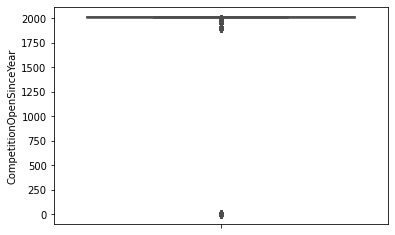

In [32]:
import seaborn as sns

sns.boxplot( y = "CompetitionOpenSinceYear" , data = rossmann_sales_df, palette = "bright")

In [33]:

rossmann_sales_df["CompetitionOpenSinceYear"] = np.where(rossmann_sales_df["CompetitionOpenSinceYear"].isna() , rossmann_sales_df["CompetitionOpenSinceYear"].mode() , rossmann_sales_df["CompetitionOpenSinceYear"])
rossmann_sales_df["CompetitionOpenSinceMonth"] = np.where(rossmann_sales_df["CompetitionOpenSinceMonth"].isna() , rossmann_sales_df["CompetitionOpenSinceMonth"].mode() , rossmann_sales_df["CompetitionOpenSinceMonth"])


In [34]:
rossmann_sales_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64

In [39]:
checking_df = rossmann_sales_df.copy()

In [35]:
for index, row in rossmann_sales_df.iterrows():
  if row["Date"].year < row["CompetitionOpenSinceYear"] or(row["Date"].year == row["CompetitionOpenSinceYear"] and row["Date"].month < row["CompetitionOpenSinceMonth"]) :
    rossmann_sales_df.at[index, "CompetitionOpenSinceYear"] = 0 
    rossmann_sales_df.at[index, "CompetitionOpenSinceMonth"] = 0
    rossmann_sales_df.at[index, "CompetitionDistance"] = 0

In [ ]:
checking_df[(checking_df["Date"] == "2013-09-10") & (checking_df["Store"] == 838)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
234332,838,2,2013-09-10,9068,863,1,1,0,0,d,c,9670.0,9.0,2013.0,1,48.0,2011.0,"Mar,Jun,Sept,Dec"


In [44]:
rossmann_new = checking_df.copy()

In [37]:
def MonthsOfCompetition(row):
  if row["CompetitionOpenSinceYear"] != 0:
    return ((row["Date"].year - row["CompetitionOpenSinceYear"])*12 + (row["Date"].month - row["CompetitionOpenSinceMonth"]))
  else:
    return 0

In [38]:
rossmann_sales_df["NumberOfMonthsFacedCompetition"] = rossmann_sales_df.apply(MonthsOfCompetition , axis = 1)

In [39]:
rossmann_sales_df.drop(["CompetitionOpenSinceMonth" , "CompetitionOpenSinceYear"] , axis = 1 , inplace = True )

In [98]:
final_df = rossmann_new.copy()

In [40]:
rossmann_sales_df.isnull().sum()

Store                                  0
DayOfWeek                              0
Date                                   0
Sales                                  0
Customers                              0
Open                                   0
Promo                                  0
StateHoliday                           0
SchoolHoliday                          0
StoreType                              0
Assortment                             0
CompetitionDistance                    0
Promo2                                 0
Promo2SinceWeek                   423307
Promo2SinceYear                   423307
PromoInterval                     423307
NumberOfMonthsFacedCompetition         0
dtype: int64

In [41]:
rossmann_sales_df["PromoInterval"] = rossmann_sales_df["PromoInterval"].fillna(0)

In [42]:
def PromoMonth(row):
  if isinstance(row["PromoInterval"], str):
    if row["Date"].strftime("%b") in row["PromoInterval"].split(","):
      return 1
    else:
      return 0
  else:
    return -1


In [43]:
rossmann_sales_df["isPromoMonth"] = rossmann_sales_df.apply(PromoMonth ,axis = 1)

In [44]:
rossmann_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,NumberOfMonthsFacedCompetition,isPromoMonth
0,353,2,2013-01-01,3139,820,1,0,a,1,b,b,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov",0.0,0
1,335,2,2013-01-01,2401,482,1,0,a,1,b,a,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0.0,1
2,512,2,2013-01-01,2646,625,1,0,a,1,b,b,0.0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",0.0,0
3,494,2,2013-01-01,3113,527,1,0,a,1,b,a,1260.0,0,NaN,NaN,0,19.0,-1
4,530,2,2013-01-01,2907,532,1,0,a,1,a,c,0.0,0,NaN,NaN,0,0.0,-1


In [45]:
rossmann_sales_df.drop(["PromoInterval"] , axis=1 , inplace = True)

In [46]:
def Promo2Running(row):
  if row["Promo2"] != 0 :
    if ( row["Date"].year < row["Promo2SinceYear"] ) or ( row["Date"].year == row["Promo2SinceYear"] and row["Date"].month < (row["Promo2SinceWeek"]//4 +1)):
      return 0
    else:
      return 1
  else:
    return 0

In [47]:
rossmann_sales_df["Promo2"] = rossmann_sales_df.apply(Promo2Running , axis = 1)

In [109]:
last_df = final_df.copy()

In [48]:
rossmann_sales_df["isPromoMonth"].value_counts()

-1    423307
 0    280926
 1    140159
Name: isPromoMonth, dtype: int64

In [49]:
rossmann_sales_df["isPromoMonth"] = np.where(rossmann_sales_df["Promo2"] == 0 , -1 , rossmann_sales_df["isPromoMonth"])

In [50]:
rossmann_sales_df["isPromoMonth"].value_counts()

-1    481194
 0    241372
 1    121826
Name: isPromoMonth, dtype: int64

In [51]:
rossmann_sales_df.isnull().sum()

Store                                  0
DayOfWeek                              0
Date                                   0
Sales                                  0
Customers                              0
Open                                   0
Promo                                  0
StateHoliday                           0
SchoolHoliday                          0
StoreType                              0
Assortment                             0
CompetitionDistance                    0
Promo2                                 0
Promo2SinceWeek                   423307
Promo2SinceYear                   423307
NumberOfMonthsFacedCompetition         0
isPromoMonth                           0
dtype: int64

In [52]:
rossmann_sales_df["Promo2SinceWeek"] = rossmann_sales_df["Promo2SinceWeek"].fillna(0)
rossmann_sales_df["Promo2SinceYear"] = rossmann_sales_df["Promo2SinceYear"].fillna(0)

In [53]:
rossmann_sales_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
NumberOfMonthsFacedCompetition    0
isPromoMonth                      0
dtype: int64

In [54]:
def MonthsPromo2(row):
  if row["Promo2"] != 0:
    return (( row["Date"].year - row["Promo2SinceYear"])*12 + (row["Date"].month - (row["Promo2SinceWeek"]//4 +1)))
  else:
    return 0

In [55]:
rossmann_sales_df["MonthsOfPromo2"] = rossmann_sales_df.apply(MonthsPromo2 , axis = 1)

In [57]:
rossmann_sales_df.drop(["Promo2SinceYear" , "Promo2SinceWeek"] , axis = 1 , inplace = True )

In [62]:
rossmann_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,NumberOfMonthsFacedCompetition,isPromoMonth,MonthsOfPromo2
0,353,2,2013-01-01,3139,820,1,0,a,1,b,b,0.0,0,0.0,-1,0.0
1,335,2,2013-01-01,2401,482,1,0,a,1,b,a,0.0,0,0.0,-1,0.0
2,512,2,2013-01-01,2646,625,1,0,a,1,b,b,0.0,0,0.0,-1,0.0
3,494,2,2013-01-01,3113,527,1,0,a,1,b,a,1260.0,0,19.0,-1,0.0
4,530,2,2013-01-01,2907,532,1,0,a,1,a,c,0.0,0,0.0,-1,0.0
